In [1]:
pip install --user --upgrade pip

In [2]:
!pip install cx_Oracle

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import cx_Oracle as cxo
import os
directory_path = os.getcwd() + "\instantclient-basic-windows.x64-21.3.0.0.0\instantclient_21_3"

cxo.init_oracle_client(lib_dir= directory_path)

In [4]:
my_username = "nm8798k"
my_password = "nm8798k"

connection = cxo.connect(user=my_username, password=my_password, dsn="OBIWAN")

In [5]:
from pandas import DataFrame
import pandas as pd
with connection.cursor() as cursor:
    cursor.execute('select * from "Session_fact_DW"')
    df = DataFrame(cursor.fetchall())
    df.columns = [x[0] for x in cursor.description]
    print("I got %d lines " % len(df))

I got 357 lines 


In [6]:
print(df)

     Session_ID  Temp_Request_ID  Temp_ID  Type_of_Cover_ID  Local_Council_ID  \
0           252          2752644    253.0                 1                 4   
1           253          2752645     11.0                 1                 4   
2           254          2752645     11.0                 1                 4   
3           255          2752645     11.0                 1                 4   
4           256          2752645      0.0                 1                 4   
..          ...              ...      ...               ...               ...   
352         710          2752763      0.0                 0                 8   
353         711          2752763      0.0                 0                 8   
354         712          2752764      0.0                 0                 3   
355         713          2752764      0.0                 2                 3   
356         714          2752764      0.0                 6                 3   

     Time_ID    Status Sess

In [7]:
df.describe()

,Session_ID,Temp_Request_ID,Temp_ID,Type_of_Cover_ID,Local_Council_ID,Time_ID
count,357.000000,3.570000e+02,355.000000,357.000000,357.000000,357.00000
mean,459.829132,2.752698e+06,68.498592,1.313725,23.375350,179.00000
std,126.575427,3.391711e+01,103.724466,0.969859,17.350137,103.20126
min,252.000000,2.752644e+06,0.000000,0.000000,2.000000,1.00000
25%,342.000000,2.752661e+06,0.000000,1.000000,4.000000,90.00000
50%,464.000000,2.752704e+06,0.000000,1.000000,26.000000,179.00000
75%,553.000000,2.752721e+06,177.000000,1.000000,36.000000,268.00000
max,714.000000,2.752764e+06,260.000000,6.000000,54.000000,357.00000


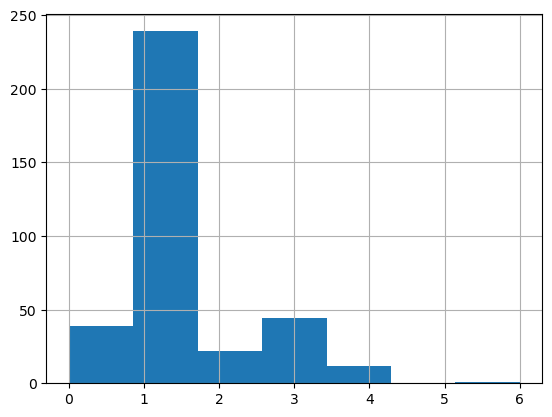

In [8]:
#histogram for target variable
import matplotlib.pyplot as plt
df["Type_of_Cover_ID"].hist(bins=7)
plt.show()

In [9]:
#Checking for null values if present
df['Temp_ID'].isna().sum()

2

In [10]:
#Dropping the null values from dataframe
df_new = df.dropna()
print(df_new)

     Session_ID  Temp_Request_ID  Temp_ID  Type_of_Cover_ID  Local_Council_ID  \
0           252          2752644    253.0                 1                 4   
1           253          2752645     11.0                 1                 4   
2           254          2752645     11.0                 1                 4   
3           255          2752645     11.0                 1                 4   
4           256          2752645      0.0                 1                 4   
..          ...              ...      ...               ...               ...   
352         710          2752763      0.0                 0                 8   
353         711          2752763      0.0                 0                 8   
354         712          2752764      0.0                 0                 3   
355         713          2752764      0.0                 2                 3   
356         714          2752764      0.0                 6                 3   

     Time_ID    Status Sess

In [11]:
df_new.value_counts('Status')

Status
Unbooked            201
booked              128
Temp Cancelled       13
Branch Cancelled     12
Booked                1
dtype: int64

In [12]:
df_new['Status'] = df_new['Status'].replace('Temp Cancelled','Cancelled')
df_new['Status'] = df_new['Status'].replace('Branch Cancelled','Cancelled')
df_new['Status'] = df_new['Status'].replace('booked','Booked')
df_new.value_counts('Status')


C:\Users\nm8798k\AppData\Local\Temp\ipykernel_25408\95314787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Status'] = df_new['Status'].replace('Temp Cancelled','Cancelled')
C:\Users\nm8798k\AppData\Local\Temp\ipykernel_25408\95314787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Status'] = df_new['Status'].replace('Branch Cancelled','Cancelled')
C:\Users\nm8798k\AppData\Local\Temp\ipykernel_25408\95314787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

Status
Unbooked     201
Booked       129
Cancelled     25
dtype: int64

In [13]:
# Using label encoding and converting categorical column status into numerical column
# encode categorical data for the 'Status' column
from sklearn.preprocessing import LabelEncoder
# create an object of the LabelEncoder class
lblEncoder_X = LabelEncoder()   
# apply LblEncoder object to our categorical variables (columns - 'Status') using the fit_transform method. This returns the column encoded.
df_new['Status'] = lblEncoder_X.fit_transform(df_new['Status']) 
#The resultant will be displayed
print(df_new)


     Session_ID  Temp_Request_ID  Temp_ID  Type_of_Cover_ID  Local_Council_ID  \
0           252          2752644    253.0                 1                 4   
1           253          2752645     11.0                 1                 4   
2           254          2752645     11.0                 1                 4   
3           255          2752645     11.0                 1                 4   
4           256          2752645      0.0                 1                 4   
..          ...              ...      ...               ...               ...   
352         710          2752763      0.0                 0                 8   
353         711          2752763      0.0                 0                 8   
354         712          2752764      0.0                 0                 3   
355         713          2752764      0.0                 2                 3   
356         714          2752764      0.0                 6                 3   

     Time_ID  Status Sessio

C:\Users\nm8798k\AppData\Local\Temp\ipykernel_25408\546364338.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Status'] = lblEncoder_X.fit_transform(df_new['Status'])


In [14]:
# Unbooked is 2 which has 201 values, 0 is Booked which has 129 values, Cancelled is 1 which has 25 values
df_new.value_counts('Status')

Status
2    201
0    129
1     25
dtype: int64

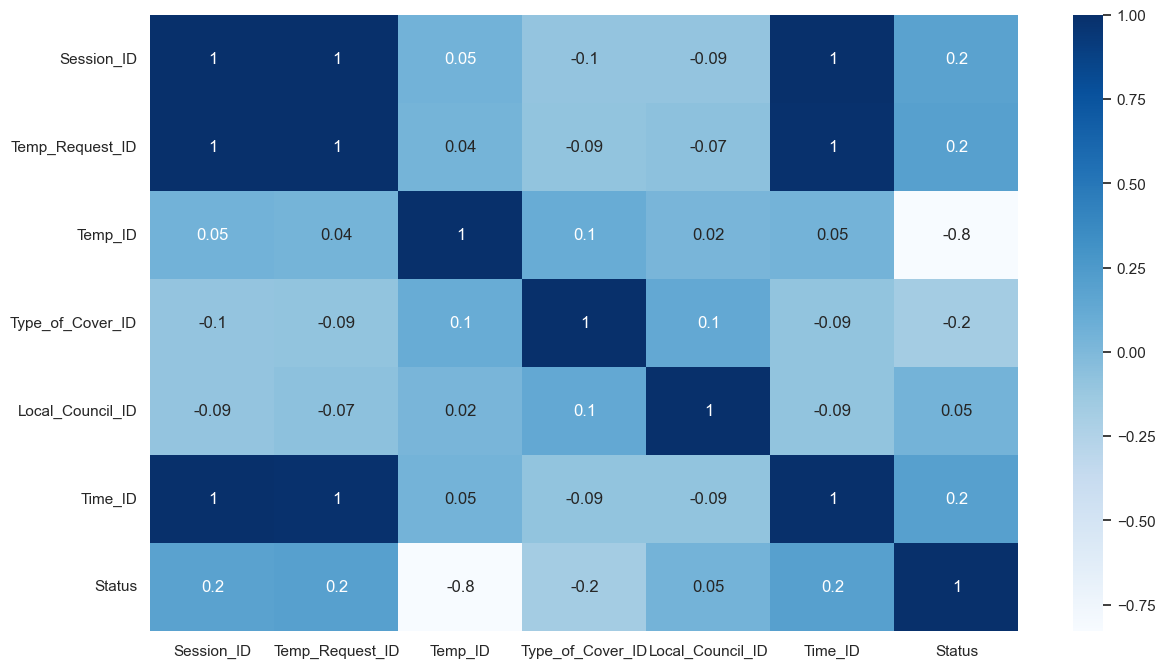

In [15]:
#Correlation using heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df_new.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [16]:
#creating numpy arrays for features and target
X = df_new.drop(['Type_of_Cover_ID', 'Session_End', 'Session_Start', 'Session_Date', 'Time_ID'], axis=1).values
y = df_new['Type_of_Cover_ID'].values
print(X)
print(y)

[[2.520000e+02 2.752644e+06 2.530000e+02 4.000000e+00 0.000000e+00]
 [2.530000e+02 2.752645e+06 1.100000e+01 4.000000e+00 0.000000e+00]
 [2.540000e+02 2.752645e+06 1.100000e+01 4.000000e+00 0.000000e+00]
 ...
 [7.120000e+02 2.752764e+06 0.000000e+00 3.000000e+00 2.000000e+00]
 [7.130000e+02 2.752764e+06 0.000000e+00 3.000000e+00 2.000000e+00]
 [7.140000e+02 2.752764e+06 0.000000e+00 3.000000e+00 2.000000e+00]]
[1 1 1 1 1 3 3 1 0 3 3 1 1 3 0 3 1 0 0 0 3 0 3 0 3 1 0 0 0 3 3 3 0 0 0 0 1
 0 0 3 3 0 0 3 0 1 1 1 1 1 1 1 1 1 4 1 1 1 1 4 4 1 2 2 2 1 2 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 3 3 3 1 3 3 3 3 3 3 1 1 2 1 1 1 1 1
 1 1 1 1 1 0 2 1 1 1 1 1 1 1 1 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 3 3 1 1 3 1 3 4 3 3 1 1 3 1 3 4 3 1 1 3 4 3 3 0 2 2 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1 1 2 1 1 1 1 1 

In [17]:
#Split the data into train and test
#importing train_test_split
from sklearn.model_selection import train_test_split
#Splitting the train dataset with 75% size and test data set with 25% size
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [18]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

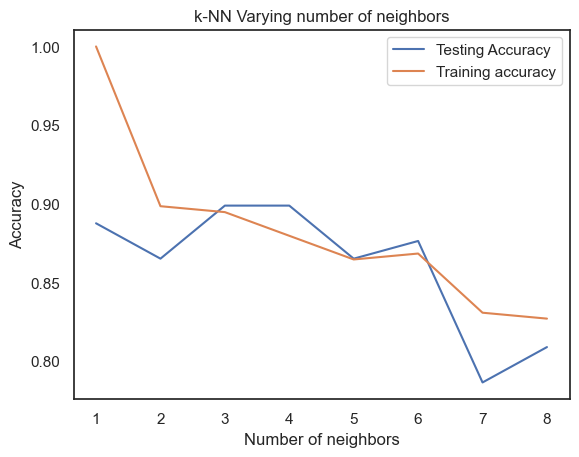

In [20]:
import matplotlib.pyplot as plt
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [22]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=4)

#Fit the model
knn.fit(X_train,y_train)
#Get accuracy.
knn.score(X_test,y_test)


0.898876404494382

In [23]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

#We can get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[11,  0,  0,  0,  0],
       [ 3, 52,  0,  3,  0],
       [ 1,  0,  3,  0,  0],
       [ 0,  0,  0, 12,  0],
       [ 0,  0,  1,  1,  2]], dtype=int64)

In [24]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,All
True,,,,,,
0,11,0,0,0,0,11
1,3,52,0,3,0,58
2,1,0,3,0,0,4
3,0,0,0,12,0,12
4,0,0,1,1,2,4
All,15,52,4,16,2,89


In [25]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.90      0.95        58
           2       0.75      0.75      0.75         4
           3       0.75      1.00      0.86        12
           4       1.00      0.50      0.67         4

    accuracy                           0.90        89
   macro avg       0.85      0.83      0.81        89
weighted avg       0.92      0.90      0.90        89



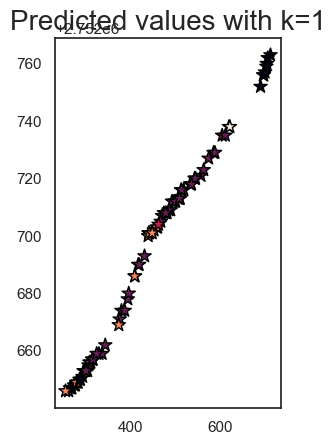

In [26]:
plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=1", fontsize=20)
plt.show()